<h1>Test result analysis<h1>

In [1]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics.cluster import pair_confusion_matrix
import seaborn as sn
font = {'size'   : 22}

plt.rc('font', **font)

<h2>Compute similarity matrices<h2>

The pair confusion matrix  computes a 2 by 2 similarity matrix between two clusterings by considering all pairs of samples and counting pairs that are assigned into the same or into different clusters under the true and predicted clusterings.

Considering a pair of samples that is clustered together a positive pair, then as in binary classification the count of true negatives is C00, false negatives is C10, true positives C11 is  and false positives is C01.

In [12]:
dataset = 'blobs'
configuration = 0

In [19]:
df_assignment_qkmeans = pd.read_csv("result/assignment/" + str(dataset) + "_qkmeans" + "_" + str(configuration) + ".csv", sep=',')
quantum_assignment = df_assignment_qkmeans['cluster']

In [20]:
df_assignment_kmeans = pd.read_csv("./result/assignment/" + str(dataset) + "_kmeans" + "_" + str(0) + ".csv", sep=',')
classical_assignment = df_assignment_kmeans['cluster']

In [45]:
deltaconf = 3

In [46]:
df_assignment_deltameans = pd.read_csv("./result/assignment/" + str(dataset) + "_deltakmeans" + "_" + str(deltaconf) + ".csv", sep=',')
delta_assignment = df_assignment_deltameans['cluster']

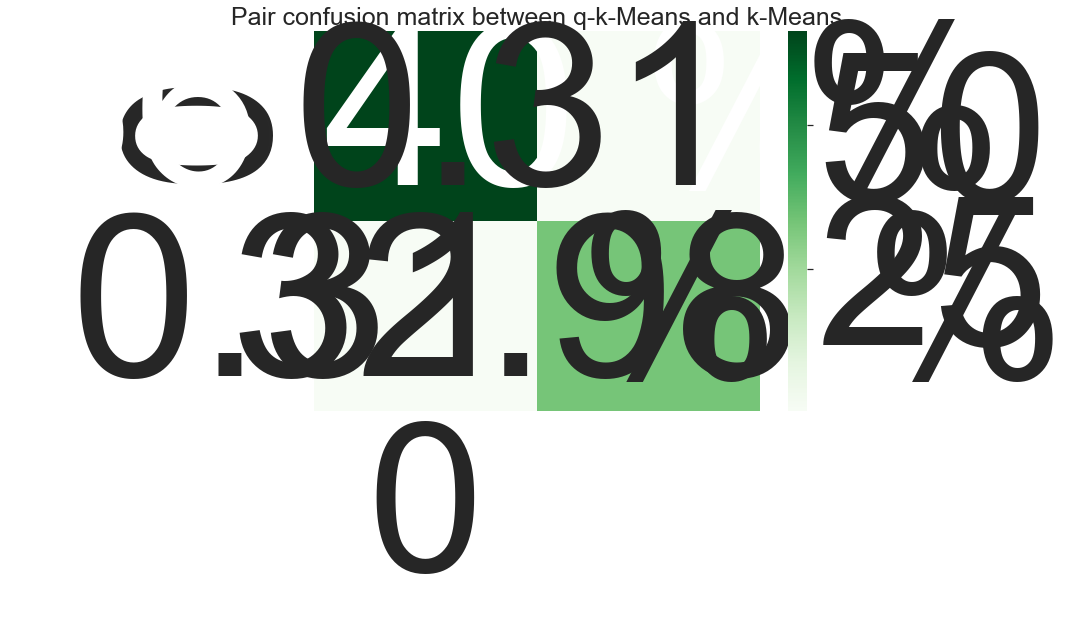

In [21]:
cm = pair_confusion_matrix(quantum_assignment, classical_assignment)
plt.figure(figsize = (10,7))
plt.title("Pair confusion matrix between q-k-Means and k-Means", fontsize=25)
cm = (cm/np.sum(cm))*100
s = sn.heatmap(cm, annot=True, fmt=".2f", cmap='Greens')
for t in s.texts: t.set_text(t.get_text() + " %")
sn.set(font_scale=19)

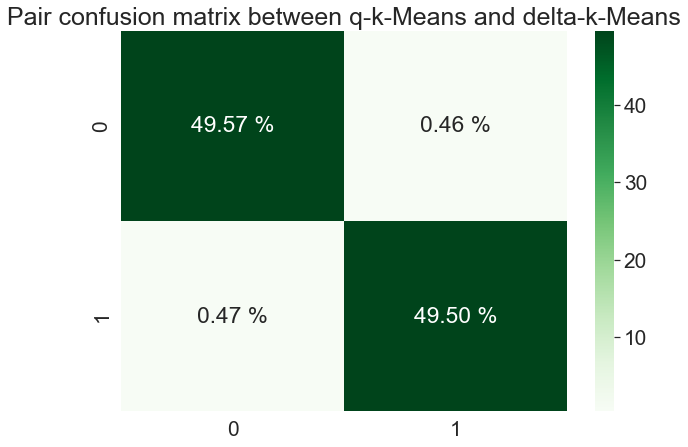

In [49]:
cm = pair_confusion_matrix(quantum_assignment, delta_assignment)
plt.figure(figsize = (10,7))
plt.title("Pair confusion matrix between q-k-Means and delta-k-Means", fontsize=25)
cm = (cm/np.sum(cm))*100
s = sn.heatmap(cm, annot=True, fmt=".2f", cmap='Greens')
for t in s.texts: t.set_text(t.get_text() + " %")
sn.set(font_scale=1.9)

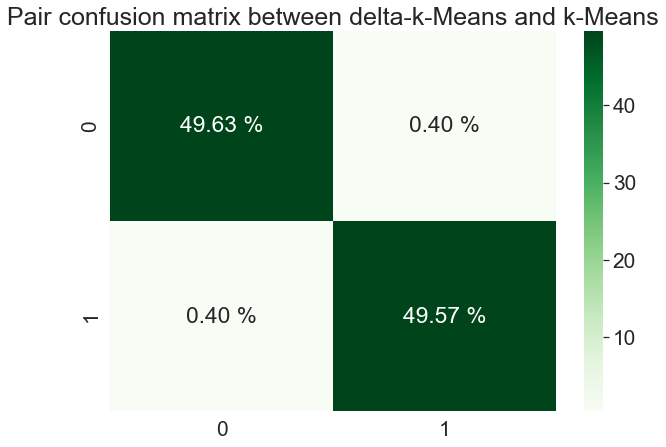

In [50]:
cm = pair_confusion_matrix(delta_assignment, classical_assignment)
plt.figure(figsize = (10,7))
plt.title("Pair confusion matrix between delta-k-Means and k-Means", fontsize=25)
cm = (cm/np.sum(cm))*100
s = sn.heatmap(cm, annot=True, fmt=".2f", cmap='Greens')
for t in s.texts: t.set_text(t.get_text() + " %")
sn.set(font_scale=1.9)

<h2>Configuration analysis<h2>

In [63]:
dataset = 'aniso'

In [64]:
df_qkmeans = pd.read_csv("result/" + str(dataset) + "_qkmeans.csv", sep=',')
df_qkmeans

,index,date,q_v,K,M,N,M1,shots,n_circuits,max_qbits,n_ite,avg_ite_time,treshold,avg_similarity,SSE,silhouette,v_measure,nm_info
0,0,2022-03-07 15:12:53,3,3,150,2,2,6144,75,8,10,48.19,0.0001,98.33,867.730,0.671,0.694,0.694
1,1,2022-03-07 15:20:56,3,3,150,2,4,12288,38,9,7,42.07,0.0001,98.57,866.580,0.674,0.694,0.694
2,2,2022-03-07 15:12:54,3,3,150,2,8,24576,19,11,5,46.11,0.0001,97.87,866.626,0.674,0.694,0.694
3,3,2022-03-07 15:16:45,3,3,150,2,16,49152,10,13,10,55.79,0.0001,98.27,861.388,0.676,0.688,0.688
4,4,2022-03-07 15:12:54,3,3,150,2,32,98304,5,15,10,70.59,0.0001,98.87,862.638,0.671,0.659,0.659
5,5,2022-03-07 15:24:40,3,3,150,2,64,196608,3,17,10,68.06,0.0001,98.40,872.244,0.670,0.700,0.700
6,6,2022-03-07 15:12:54,3,3,150,2,128,393216,2,19,10,106.15,0.0001,98.33,873.835,0.665,0.700,0.700
7,7,2022-03-07 15:30:36,3,3,150,2,150,460800,1,21,10,325.02,0.0001,97.67,882.478,0.664,0.713,0.713


In [65]:
df_kmeans = pd.read_csv("result/" + str(dataset) + "_kmeans.csv", sep=',')
df_kmeans

,index,date,K,M,N,n_ite,avg_ite_time,treshold,SSE,silhouette,v_measure,nm_info
0,0,2022-03-07 16:24:54,3,150,2,4,0.0,0.0001,240.192,0.676,0.688,0.688


In [18]:
df_deltakmeans = pd.read_csv("result/" + str(dataset) + "_deltakmeans.csv", sep=',')
df_deltakmeans

,index,date,K,M,N,n_ite,avg_ite_time,treshold,avg_similarity,SSE,silhouette,v_measure,nm_info
0,0,2022-03-08 17:59:22,3,150,2,10,0.01,0.0001,89.2,938.722,0.546,0.66,0.66


In [67]:
df_qkmeans[df_qkmeans['SSE']==min(df_qkmeans['SSE'])]

,index,date,q_v,K,M,N,M1,shots,n_circuits,max_qbits,n_ite,avg_ite_time,treshold,avg_similarity,SSE,silhouette,v_measure,nm_info
3,3,2022-03-07 15:16:45,3,3,150,2,16,49152,10,13,10,55.79,0.0001,98.27,861.388,0.676,0.688,0.688


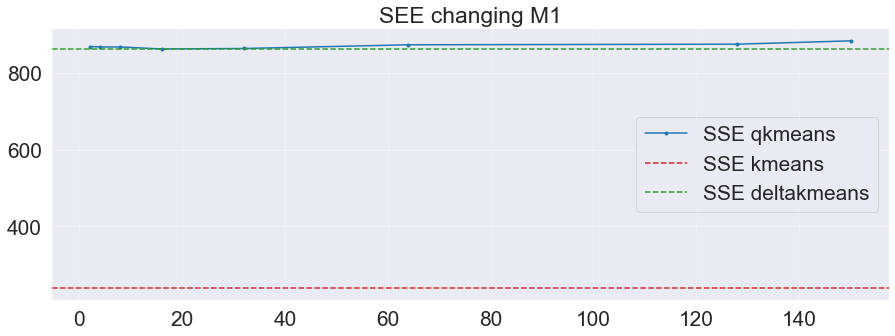

In [68]:
plt.figure(figsize=(15,5))
plt.plot(df_qkmeans['M1'],df_qkmeans['SSE'], color='tab:blue', marker=".", label='SSE qkmeans')
plt.axhline(y=float(df_kmeans['SSE']), color='tab:red', linestyle='--', label='SSE kmeans')
plt.axhline(y=float(df_deltakmeans['SSE']), color='tab:green', linestyle='--', label='SSE deltakmeans')
plt.title("SEE changing M1")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

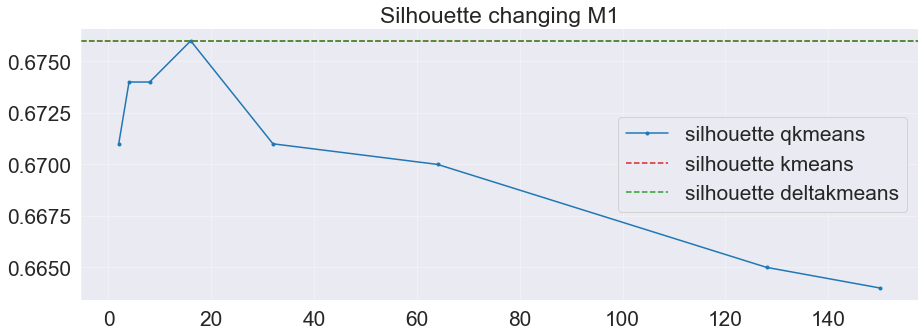

In [69]:
plt.figure(figsize=(15,5))
plt.plot(df_qkmeans['M1'],df_qkmeans['silhouette'], color='tab:blue', marker=".", label='silhouette qkmeans')
plt.axhline(y=float(df_kmeans['silhouette']), color='tab:red', linestyle='--', label='silhouette kmeans')
plt.axhline(y=float(df_deltakmeans['silhouette']), color='tab:green', linestyle='--', label='silhouette deltakmeans')
plt.title("Silhouette changing M1")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

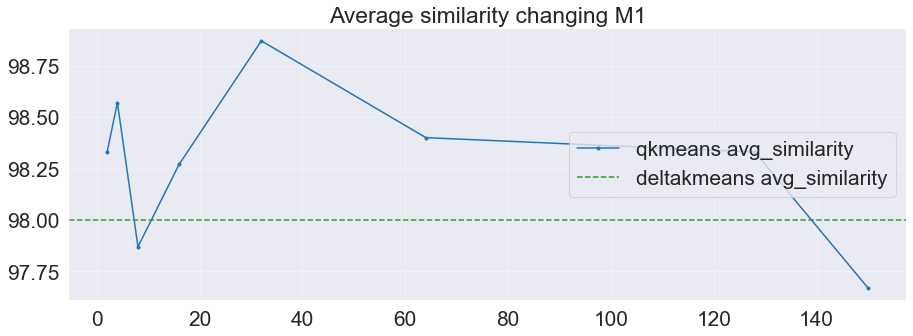

In [70]:
plt.figure(figsize=(15,5))
plt.plot(df_qkmeans['M1'],df_qkmeans['avg_similarity'], marker=".", color='tab:blue', label='qkmeans avg_similarity')
plt.axhline(y=int(df_deltakmeans['avg_similarity']), color='tab:green', linestyle='--', label='deltakmeans avg_similarity')
plt.title("Average similarity changing M1")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

<h2>Shots analysis<h2>

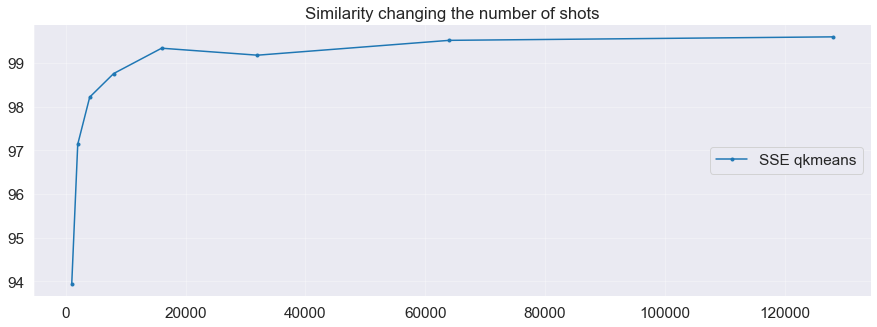

In [21]:
plt.figure(figsize=(15,5))
plt.plot(df_qkmeans['shots'],df_qkmeans['avg_similarity'], color='tab:blue', marker=".", label='SSE qkmeans')
plt.title("Similarity changing the number of shots")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

<h2>Measure analysis per iteration<h2>

In [2]:
dataset = 'diabetes'
configuration = 0

In [4]:
df_measure_qkmeans = pd.read_csv("result/measures/" + str(dataset) + "_qkmeans_" + str(configuration) + ".csv", sep=',')
#df_measure_deltakmeans = pd.read_csv("result/measures/" + str(dataset) + "_deltakmeans_0.csv", sep=',')

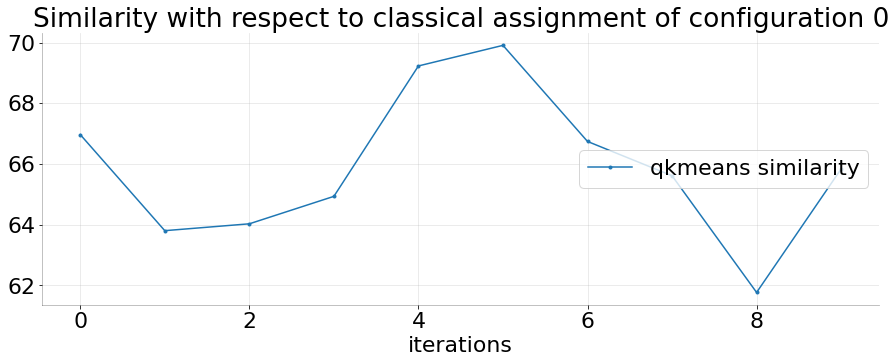

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
plt.title("Similarity with respect to classical assignment of configuration " + str(configuration))
ax.set(xlabel='iterations')
ax.plot(df_measure_qkmeans['similarity'], marker=".", color='tab:blue', label='qkmeans similarity')
#ax.plot(df_measure_deltakmeans['similarity'], marker=".", color="tab:green", label='deltakmeans similarity')
ax.legend()
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

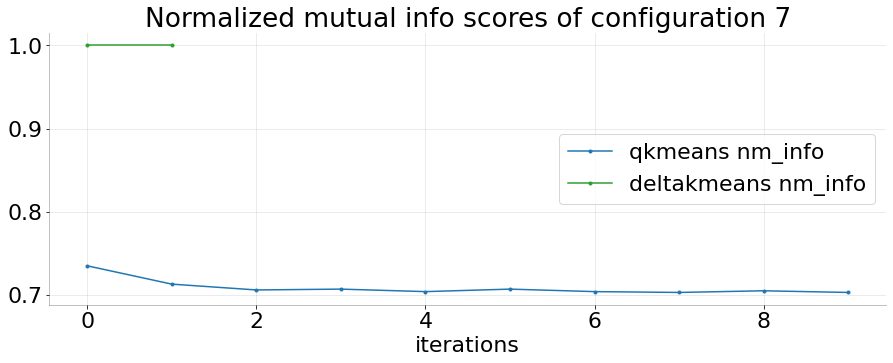

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
plt.title("Normalized mutual info scores of configuration " + str(configuration))
ax.set(xlabel='iterations')
ax.plot(df_measure_qkmeans['nm_info'], marker=".", color='tab:blue', label='qkmeans nm_info')
ax.plot(df_measure_deltakmeans['nm_info'], marker=".", color="tab:green", label='deltakmeans nm_info')
ax.legend()
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

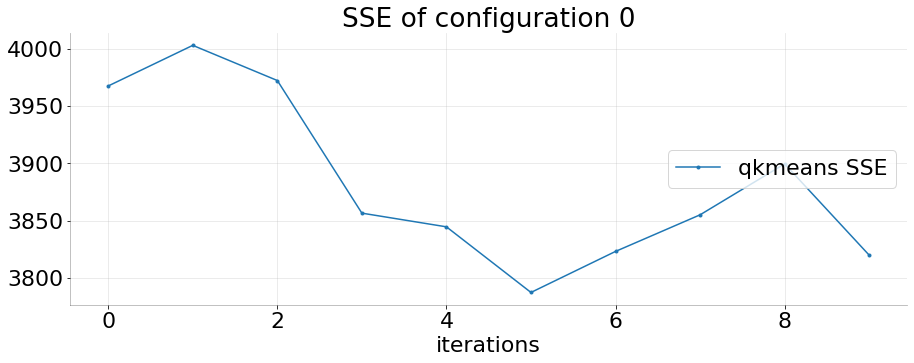

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
plt.title("SSE of configuration " + str(configuration))
ax.set(xlabel='iterations')
ax.plot(df_measure_qkmeans['SSE'], marker=".", color='tab:blue', label='qkmeans SSE')
#ax.plot(df_measure_deltakmeans['SSE'], marker=".", color="tab:green", label='deltakmeans SSE')
ax.legend()
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

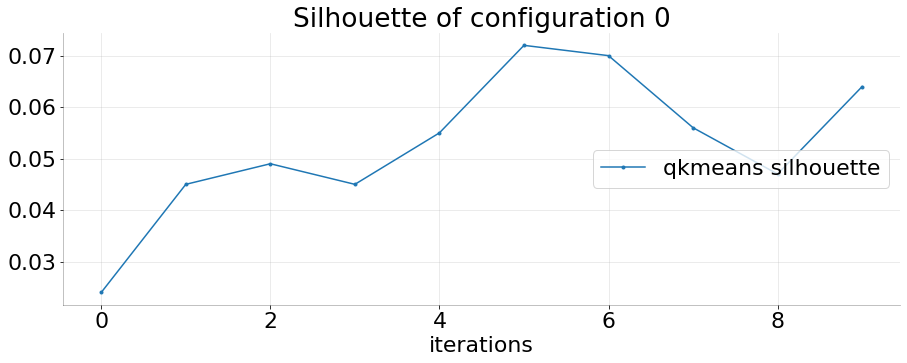

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
plt.title("Silhouette of configuration " + str(configuration))
ax.set(xlabel='iterations')
ax.plot(df_measure_qkmeans['silhouette'], marker=".", color='tab:blue', label='qkmeans silhouette')
#ax.plot(df_measure_deltakmeans['silhouette'], marker=".", color="tab:green", label='deltakmeans silhouette')
ax.legend()
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

<h2>Cluster result<h2>

In [2]:
dataset = ['aniso','blobs','blobs2','noisymoon']
configuration = 0

In [20]:
'''
f, axarr = plt.subplots(len(dataset),3)

curr_row = 0
for index, d in enumerate(dataset):
    
    a = plt.imread("./plot/cluster/" + str(d) + "_kmeans_0.png")
    b = plt.imread("./plot/cluster/" + str(d) + "_deltakmeans_0.png")
    c = plt.imread("./plot/cluster/" + str(d) + "_qkmeans_0.png")

    axarr[index,0].imshow(a)
    axarr[index,0].axis('off')
    axarr[index,1].imshow(b)
    axarr[index,1].axis('off')
    axarr[index,2].imshow(c)
    axarr[index,2].axis('off')
'''

'\nf, axarr = plt.subplots(len(dataset),3)\n\ncurr_row = 0\nfor index, d in enumerate(dataset):\n    \n    a = plt.imread("./plot/cluster/" + str(d) + "_kmeans_0.png")\n    b = plt.imread("./plot/cluster/" + str(d) + "_deltakmeans_0.png")\n    c = plt.imread("./plot/cluster/" + str(d) + "_qkmeans_0.png")\n\n    axarr[index,0].imshow(a)\n    axarr[index,0].axis(\'off\')\n    axarr[index,1].imshow(b)\n    axarr[index,1].axis(\'off\')\n    axarr[index,2].imshow(c)\n    axarr[index,2].axis(\'off\')\n'

In [10]:
configuration = 7

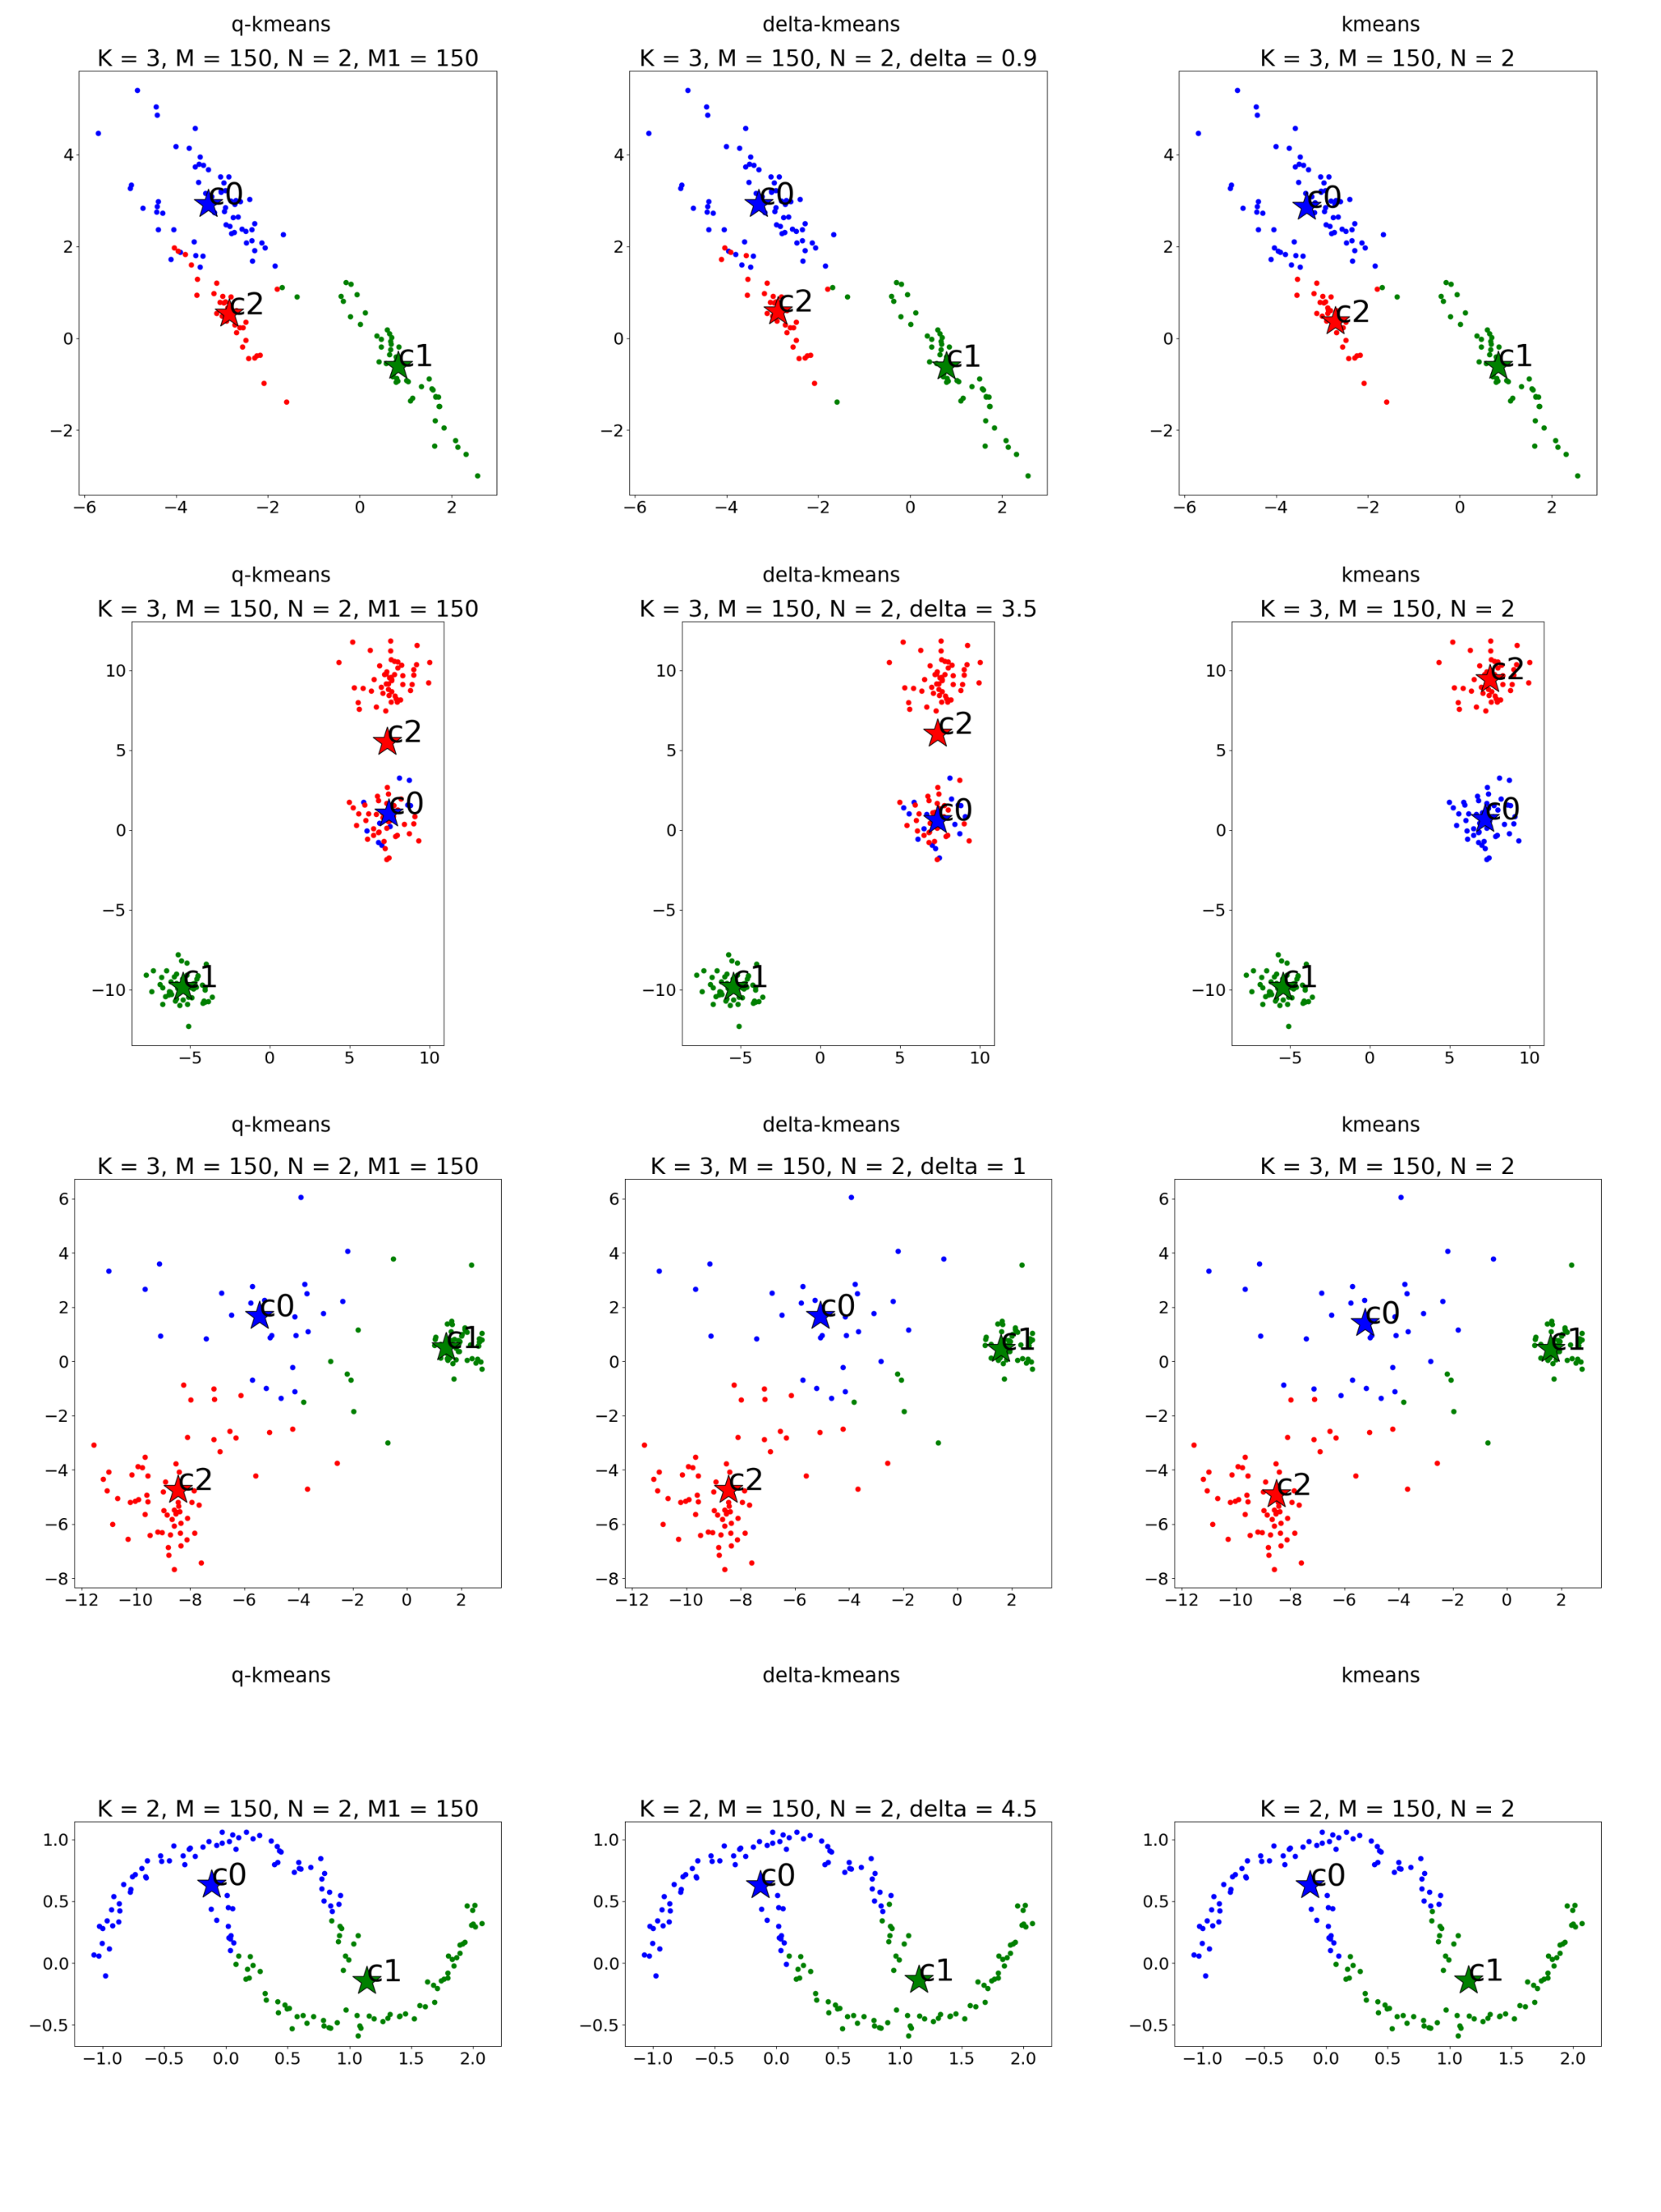

In [12]:
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image

def img_reshape(img):
    img = Image.open(img).convert('RGB')
    img = img.resize((800,800))
    img = np.asarray(img)
    return img

img_arr = []

for index, d in enumerate(dataset):
    
    img_arr.append(img_reshape("./plot/cluster/" + str(d) + "_qkmeans_" + str(configuration) + ".png"))
    img_arr.append(img_reshape("./plot/cluster/" + str(d) + "_deltakmeans_0.png"))
    img_arr.append(img_reshape("./plot/cluster/" + str(d) + "_kmeans_0.png"))


fig = plt.figure(figsize=(50., 50.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(len(dataset), 3),  # creates 2x2 grid of axes
                 axes_pad=0,  # pad between axes
                 )

for ax, im in zip(grid, img_arr):
    ax.imshow(im)
    ax.axis('off')

plt.show()

<h2>probabilities analysis <h2>

In [26]:
dataset = 'iris'
df_prob = pd.read_csv("result/probabilities/" + str(dataset) + ".csv", sep=',')
df_prob

,Unnamed: 0,M1,N,K,p(R=1)_theo,p(R=1)_1-norm,p(R=1)_1-inf
0,0,64,4,1,0.25,18.530273,37.438965
1,1,64,4,2,0.25,24.902344,53.796387
2,2,64,4,3,0.25,21.704102,48.559570
3,3,64,4,4,0.25,24.682617,50.585938
4,4,64,4,5,0.25,21.057129,41.638184
5,5,64,4,6,0.25,22.314453,44.689941
6,6,64,4,7,0.25,22.387695,48.583984
7,7,64,4,8,0.25,25.341797,53.039551


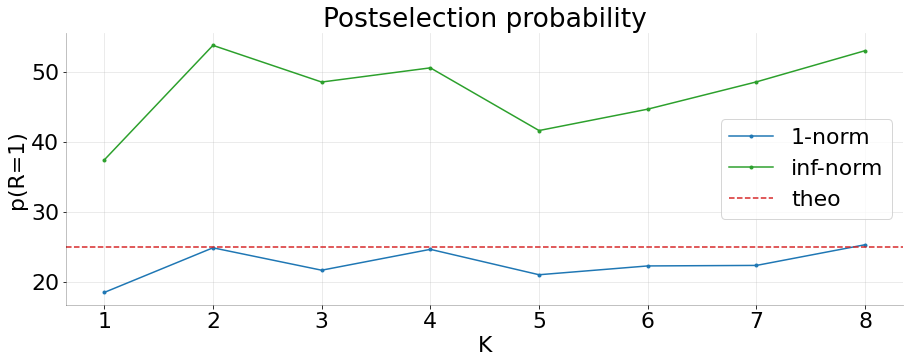

In [28]:
plt.figure(figsize=(15,5))
plt.plot(df_prob['K'],df_prob['p(R=1)_1-norm'], color='tab:blue', marker=".", label='1-norm')
plt.plot(df_prob['K'],df_prob['p(R=1)_1-inf'], color='tab:green', marker=".", label='inf-norm')
plt.axhline(y=df_prob['p(R=1)_theo'][0]*100, color='tab:red', linestyle='--', label='theo')
plt.title("Postselection probability")
plt.xlabel("K")
plt.ylabel("p(R=1)")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [ ]:
# ora mi prendoo una configurazione ideale dei parametri (per iris k=3, m1 = 8, sempre sample di 64 ) e tenendo fisso il numero di shots 
# eseguo prima la versione con 1-norm e poi quella con inf-norm facendo vedere la differenza nella similarity

In [6]:
dataset = 'noisymoon'
df_prob = pd.read_csv("result/probabilities/" + str(dataset) + ".csv", sep=',')
df_prob

,Unnamed: 0,M1,N,K,p(R=1)_theo,p(R=1)_1-norm,p(R=1)_inf-norm
0,0,2.0,2.0,2.0,0.5,49.989,60.212
1,1,4.0,2.0,2.0,0.5,50.038,60.208
2,2,8.0,2.0,2.0,0.5,49.716,59.654
3,3,16.0,2.0,2.0,0.5,49.377,59.792
4,4,32.0,2.0,2.0,0.5,48.577,58.252
5,5,64.0,2.0,2.0,0.5,47.611,57.259
6,6,128.0,2.0,2.0,0.5,46.039,55.194
7,7,150.0,2.0,2.0,0.5,38.965,46.045


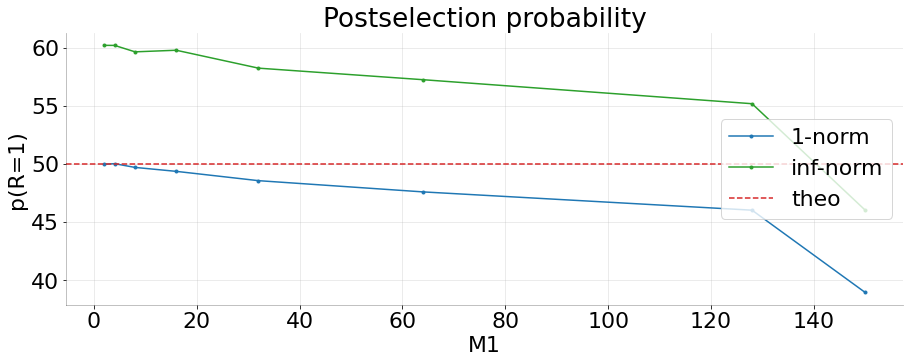

In [8]:
plt.figure(figsize=(15,5))
plt.plot(df_prob['M1'],df_prob['p(R=1)_1-norm'], color='tab:blue', marker=".", label='1-norm')
plt.plot(df_prob['M1'],df_prob['p(R=1)_inf-norm'], color='tab:green', marker=".", label='inf-norm')
plt.axhline(y=df_prob['p(R=1)_theo'][0]*100, color='tab:red', linestyle='--', label='theo')
plt.title("Postselection probability")
plt.xlabel("M1")
plt.ylabel("p(R=1)")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [9]:
dataset = 'blobs'
df_prob = pd.read_csv("result/probabilities/" + str(dataset) + ".csv", sep=',')
df_prob

,Unnamed: 0,M1,N,K,p(R=1)_theo,p(R=1)_1-norm,p(R=1)_inf-norm
0,0,2.0,2.0,3.0,0.5,43.657,61.460
1,1,4.0,2.0,3.0,0.5,43.795,61.353
2,2,8.0,2.0,3.0,0.5,43.292,61.035
3,3,16.0,2.0,3.0,0.5,43.202,60.430
4,4,32.0,2.0,3.0,0.5,42.561,59.106
5,5,64.0,2.0,3.0,0.5,41.687,57.601
6,6,128.0,2.0,3.0,0.5,40.265,56.421
7,7,150.0,2.0,3.0,0.5,34.045,47.107


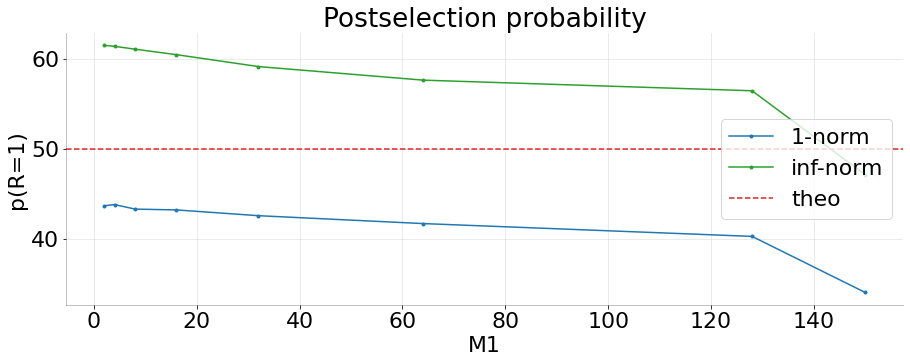

In [10]:
plt.figure(figsize=(15,5))
plt.plot(df_prob['M1'],df_prob['p(R=1)_1-norm'], color='tab:blue', marker=".", label='1-norm')
plt.plot(df_prob['M1'],df_prob['p(R=1)_inf-norm'], color='tab:green', marker=".", label='inf-norm')
plt.axhline(y=df_prob['p(R=1)_theo'][0]*100, color='tab:red', linestyle='--', label='theo')
plt.title("Postselection probability")
plt.xlabel("M1")
plt.ylabel("p(R=1)")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [12]:
dataset = 'iris'
df_prob = pd.read_csv("result/probabilities/" + str(dataset) + ".csv", sep=',')
df_prob

,Unnamed: 0,M1,N,K,p(R=1)_theo,p(R=1)_1-norm,p(R=1)_inf-norm
0,0,2.0,4.0,3.0,0.25,21.905,51.079
1,1,4.0,4.0,3.0,0.25,21.768,51.183
2,2,8.0,4.0,3.0,0.25,21.558,50.869
3,3,16.0,4.0,3.0,0.25,21.827,50.497
4,4,32.0,4.0,3.0,0.25,20.967,49.211
5,5,64.0,4.0,3.0,0.25,20.496,48.665
6,6,128.0,4.0,3.0,0.25,19.904,47.437
7,7,150.0,4.0,3.0,0.25,16.724,40.198


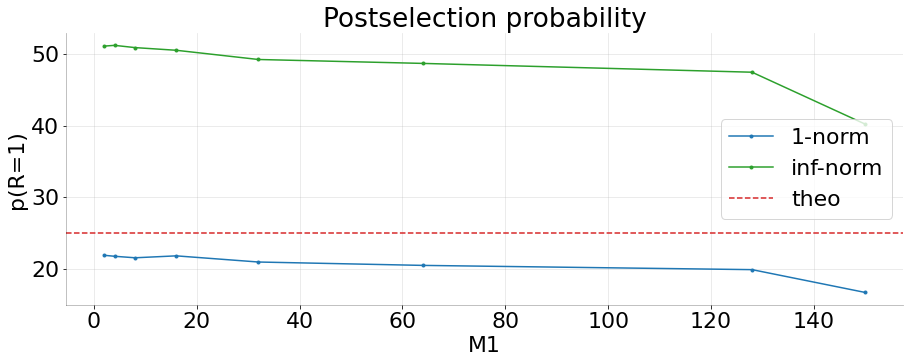

In [13]:
plt.figure(figsize=(15,5))
plt.plot(df_prob['M1'],df_prob['p(R=1)_1-norm'], color='tab:blue', marker=".", label='1-norm')
plt.plot(df_prob['M1'],df_prob['p(R=1)_inf-norm'], color='tab:green', marker=".", label='inf-norm')
plt.axhline(y=df_prob['p(R=1)_theo'][0]*100, color='tab:red', linestyle='--', label='theo')
plt.title("Postselection probability")
plt.xlabel("M1")
plt.ylabel("p(R=1)")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [2]:
m = [x for x in range(2,65)]

In [3]:
prob = [50.008,43.846,50.077,40.693,44.071,47.056,49.958,39.902,41.574,42.608,44.492,45.138,46.875,48.705,50.296,38.507,40.12,40.766,42.065,42.505,41.628,43.744,45.081,44.545,44.858,44.741,47.83,46.826,48.833,49.263,50.064,40.231,40.909,40.085,39.252,39.255,41.626,40.799,42.563,40.9,43.509,42.143,41.691,41.85,41.488,41.333,45.911,45.573,45.931,44.926,44.214,44.189,44.763,44.303,48.027,46.932,46.159,45.772,48.808]

In [4]:
len(prob)

59

In [7]:
len(m)

59

In [6]:
m = [x for x in range(2,61)] 

In [11]:
prob = [x/100 for x in prob]

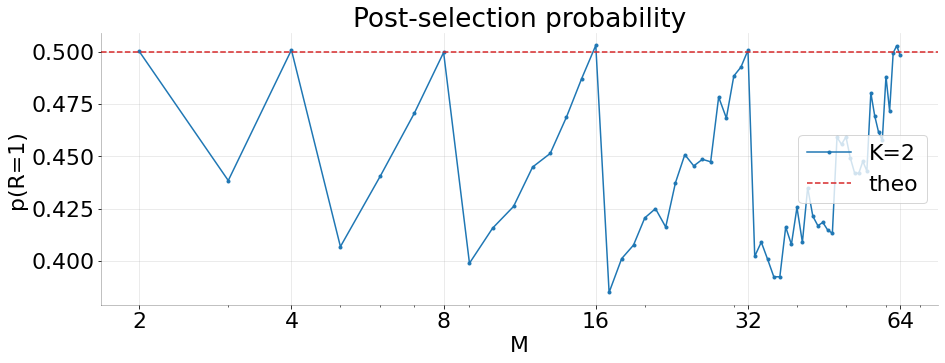

In [36]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xscale('log')
x_ticks = [2**i for i in range(0, 7)]
ax.set_xticks(x_ticks, [str(i) for i in x_ticks])
plt.plot(m,prob, color='tab:blue', marker=".", label='K=2')
#plt.plot(m,prob2, color='tab:green', marker=".", label='K=3')
plt.axhline(y=0.5, color='tab:red', linestyle='--', label='theo')
plt.title("Post-selection probability")
plt.xlabel("M")
plt.ylabel("p(R=1)")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [34]:
prob2 = [x-0.2 for x in prob]

In [21]:
prob

[0.5000800000000001,
 0.43845999999999996,
 0.5007699999999999,
 0.40692999999999996,
 0.44071,
 0.47056,
 0.49957999999999997,
 0.39902,
 0.41574,
 0.42607999999999996,
 0.44492,
 0.45138,
 0.46875,
 0.48705,
 0.50296,
 0.38506999999999997,
 0.4012,
 0.40765999999999997,
 0.42064999999999997,
 0.42505000000000004,
 0.41628,
 0.43744,
 0.45081000000000004,
 0.44545,
 0.44858,
 0.44741,
 0.4783,
 0.46826,
 0.48833,
 0.49262999999999996,
 0.50064,
 0.40231,
 0.40909,
 0.40085,
 0.39252000000000004,
 0.39255,
 0.41625999999999996,
 0.40799,
 0.42563,
 0.409,
 0.43509,
 0.42143,
 0.41691,
 0.41850000000000004,
 0.41487999999999997,
 0.41333,
 0.45911,
 0.45573,
 0.45931,
 0.44926,
 0.44214,
 0.44189,
 0.44763,
 0.44303,
 0.48027000000000003,
 0.46932,
 0.46159,
 0.45771999999999996,
 0.48808]

In [22]:
p1 = [47.164,49.935,50.277,49.823]

In [24]:
p1 = [x/100 for x in p1]

In [25]:
len(prob) + len(p1)

63

In [30]:
prob = prob + p1

In [32]:
prob

[0.5000800000000001,
 0.43845999999999996,
 0.5007699999999999,
 0.40692999999999996,
 0.44071,
 0.47056,
 0.49957999999999997,
 0.39902,
 0.41574,
 0.42607999999999996,
 0.44492,
 0.45138,
 0.46875,
 0.48705,
 0.50296,
 0.38506999999999997,
 0.4012,
 0.40765999999999997,
 0.42064999999999997,
 0.42505000000000004,
 0.41628,
 0.43744,
 0.45081000000000004,
 0.44545,
 0.44858,
 0.44741,
 0.4783,
 0.46826,
 0.48833,
 0.49262999999999996,
 0.50064,
 0.40231,
 0.40909,
 0.40085,
 0.39252000000000004,
 0.39255,
 0.41625999999999996,
 0.40799,
 0.42563,
 0.409,
 0.43509,
 0.42143,
 0.41691,
 0.41850000000000004,
 0.41487999999999997,
 0.41333,
 0.45911,
 0.45573,
 0.45931,
 0.44926,
 0.44214,
 0.44189,
 0.44763,
 0.44303,
 0.48027000000000003,
 0.46932,
 0.46159,
 0.45771999999999996,
 0.48808,
 0.47164,
 0.49935,
 0.50277,
 0.49823]

In [28]:
m.append(61)
m.append(62)
m.append(63)
m.append(64)

In [2]:
prob = [50.008,43.846,50.077,40.693,44.071,47.056,49.958,39.902,41.574,42.608,44.492,45.138,46.875,48.705,50.296,38.507,40.12,40.766,42.065,42.505,41.628,43.744,45.081,44.545,44.858,44.741,47.83,46.826,48.833,49.263,50.064,40.231,40.909,40.085,39.252,39.255,41.626,40.799,42.563,40.9,43.509,42.143,41.691,41.85,41.488,41.333,45.911,45.573,45.931,44.926,44.214,44.189,44.763,44.303,48.027,46.932,46.159,45.772,48.808,47.164,49.935,50.277,49.823,43.457,43.347,43.365,43.213,43.073,43.14,43.091,42.096,44.171,42.999,42.2,42.377,42.572,42.413,42.737,41.913,42.572,41.272,42.072,41.846,41.235,41.663,41.016,41.492,41.473,40.741,41.687,41.223,40.369,40.222,40.918,47.107,45.856,46.594,45.306,46.436,45.27,45.367,44.928,44.263,43.555,43.872,43.646,43.359,42.828,43.085,42.31,48.566,46.985,47.174,46.326,45.496,45.056,44.55,42.505,48.767,47.803,45.966,45.715,50.171,46.735,50.366,43.762,49.402]


In [3]:
m=[x for x in range(2,129)]

In [7]:
prob = [x/100 for x in prob]

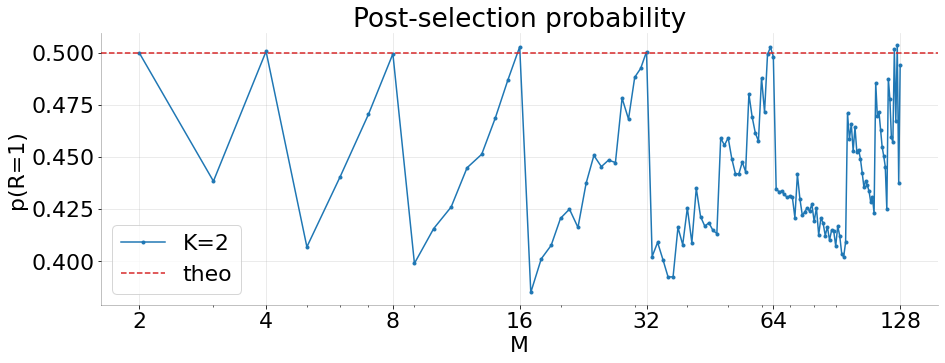

In [11]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xscale('log')
x_ticks = [2**i for i in range(0, 8)]
ax.set_xticks(x_ticks, [str(i) for i in x_ticks])
plt.plot(m,prob, color='tab:blue', marker=".", label='K=2')
#plt.plot(m,prob2, color='tab:green', marker=".", label='K=3')
plt.axhline(y=0.5, color='tab:red', linestyle='--', label='theo')
plt.title("Post-selection probability")
plt.xlabel("M")
plt.ylabel("p(R=1)")
plt.legend(loc='lower left', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [12]:
probk3 = [43.819,37.621,43.667,34.583,37.644,40.789,43.764,33.53,34.894,36.36,38.286,39.023,41.278,42.348,43.849,31.834,34.044,34.755,35.507,36.272,35.384,36.928,38.234,37.927,38.74,38.535,41.177,40.713,42.4,43.374,44.485,33.908,33.64,33.319,33.069,33.017,35.587,34.967,36.6,34.491,36.89,35.539,35.242,34.762,35.787,34.843,39.571,39.738,38.953,39.001,38.489,38.468,38.155,37.805,41.492,41.048,40.153,39.482,42.346,40.629,43.595,43.66,44.067,37.994,37.598,37.317,36.646,36.127,37.305,37.073,36.505,36.707,37.616,36.578,36.243,36.292,36.664,36.157,35.718,36.145,35.87,35.01,35.028,35.522,35.516,34.93,35.748,34.796,35.333,34.833,34.589,34.644,34.961,34.906,40.625,39.661,40.527,40.192,40.21,39.984,38.812,38.568,37.366,38.049,37.549,37.903,37.457,36.383,36.81,36.749,42.041,41.479,40.741,39.673,39.221,39.331,38.568,37.061,43.011,41.077,40.472,38.507,42.822,40.24,44.043,37.903,43.982]

In [16]:
probk3 = [c/100 for c in probk3]

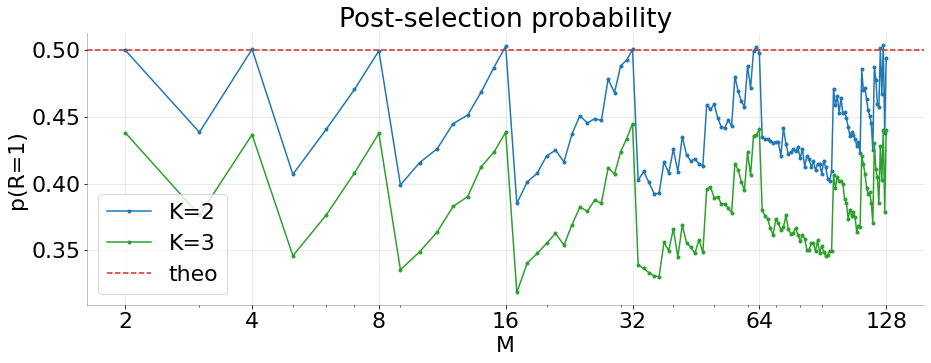

In [17]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xscale('log')
x_ticks = [2**i for i in range(0, 8)]
ax.set_xticks(x_ticks, [str(i) for i in x_ticks])
plt.plot(m,prob, color='tab:blue', marker=".", label='K=2')
plt.plot(m,probk3, color='tab:green', marker=".", label='K=3')
plt.axhline(y=0.5, color='tab:red', linestyle='--', label='theo')
plt.title("Post-selection probability")
plt.xlabel("M")
plt.ylabel("p(R=1)")
plt.legend(loc='lower left', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [8]:
len(probinf)

127

In [11]:
probinf = [61.386,
54.014,
61.416,
49.897,
54.058,
57.756,
61.406,
48.692,
50.853,
52.284,
54.696,
55.175,
57.821,
59.907,
60.942,
46.988,
49.654,
50.146,
51.976,
51.756,
50.869,
53.359,
55.658,
54.474,
55.732,
55.063,
58.45,
57.275,
60.168,
60.94,
61.832,
49.094,
49.106,
49.487,
48.413,
47.87,
51.749,
50.47,
53.952,
51.218,
52.426,
50.879,
51.046,
51.127,
51.619,
50.916,
56.938,
56.47,
55.343,
55.147,
55.509,
54.7,
54.199,
54.195,
59.79,
58.826,
57.812,
55.912,
60.6,
58.716,
61.275,
60.514,
61.115,
52.618,
53.65,
52.875,
53.156,
52.667,
53.143,
52.448,
53.149,
52.039,
52.02,
52.643,
51.263,
52.161,
51.691,
51.471,
51.471,
51.117,
51.373,
51.434,
51.593,
50.94,
51.105,
50.684,
50.513,
50.836,
50.409,
50.867,
50.342,
50.47,
49.438,
49.811,
57.251,
57.495,
57.697,
56.122,
56.689,
55.731,
55.933,
55.621,
54.694,
54.724,
54.205,
53.833,
53.796,
52.203,
53.052,
52.533,
59.686,
59.351,
57.983,
57.275,
56.732,
55.835,
54.681,
53.925,
62.158,
60.022,
58.777,
57.422,
62.17,
56.58,
60.846,
51.923,
61.548]


In [12]:
len(m)

127

In [13]:
m = [x for x in range(2,129)]
probinf = [x/100 for x in probinf]

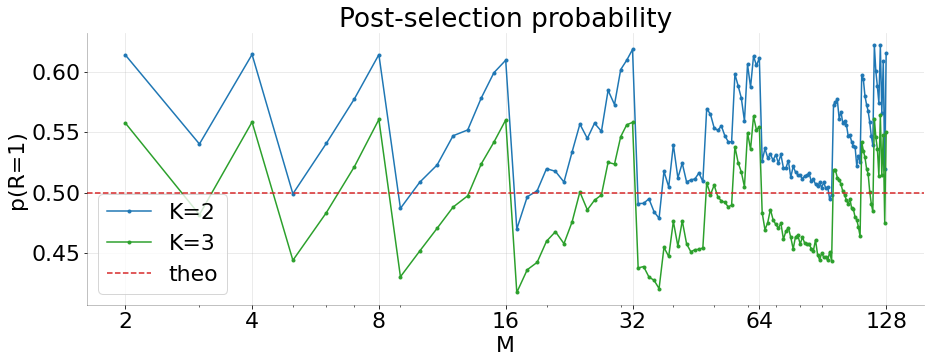

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xscale('log')
x_ticks = [2**i for i in range(0, 8)]
ax.set_xticks(x_ticks, [str(i) for i in x_ticks])
plt.plot(m,probinf, color='tab:blue', marker=".", label='K=2')
plt.plot(m,probinf2, color='tab:green', marker=".", label='K=3')
plt.axhline(y=0.5, color='tab:red', linestyle='--', label='theo')
plt.title("Post-selection probability")
plt.xlabel("M")
plt.ylabel("p(R=1)")
plt.legend(loc='lower left', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [2]:
dataset = 'blobs'
df_prob = pd.read_csv("result/probabilities/" + str(dataset) + ".csv", sep=',')
df_prob

FileNotFoundError: [Errno 2] No such file or directory: 'result/probabilities/blobs.csv'

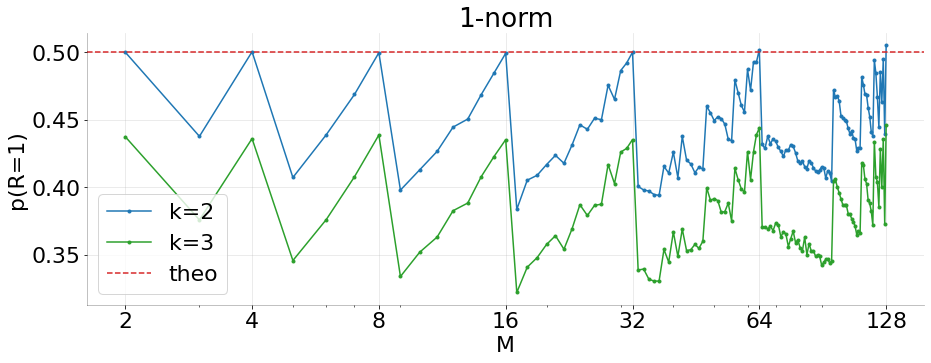

In [3]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xscale('log')
x_ticks = [2**i for i in range(0, 8)]
ax.set_xticks(x_ticks, [str(i) for i in x_ticks])
plt.plot(df_prob[df_prob['K']==2]['M1'],df_prob[df_prob['K']==2]['p(R=1)_1-norm']/100, color='tab:blue', marker=".", label='k=2')
plt.plot(df_prob[df_prob['K']==3]['M1'],df_prob[df_prob['K']==3]['p(R=1)_1-norm']/100, color='tab:green', marker=".", label='k=3')
plt.axhline(y=0.5, color='tab:red', linestyle='--', label='theo')
plt.title("1-norm")
plt.xlabel("M")
plt.ylabel("p(R=1)")
plt.legend(loc='lower left', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

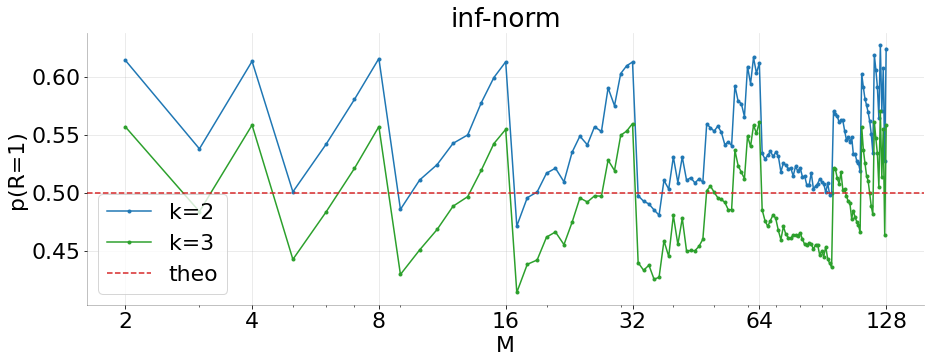

In [4]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xscale('log')
x_ticks = [2**i for i in range(0, 8)]
ax.set_xticks(x_ticks, [str(i) for i in x_ticks])
plt.plot(df_prob[df_prob['K']==2]['M1'],df_prob[df_prob['K']==2]['p(R=1)_inf-norm']/100, color='tab:blue', marker=".", label='k=2')
plt.plot(df_prob[df_prob['K']==3]['M1'],df_prob[df_prob['K']==3]['p(R=1)_inf-norm']/100, color='tab:green', marker=".", label='k=3')
plt.axhline(y=0.5, color='tab:red', linestyle='--', label='theo')
plt.title("inf-norm")
plt.xlabel("M")
plt.ylabel("p(R=1)")
plt.legend(loc='lower left', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

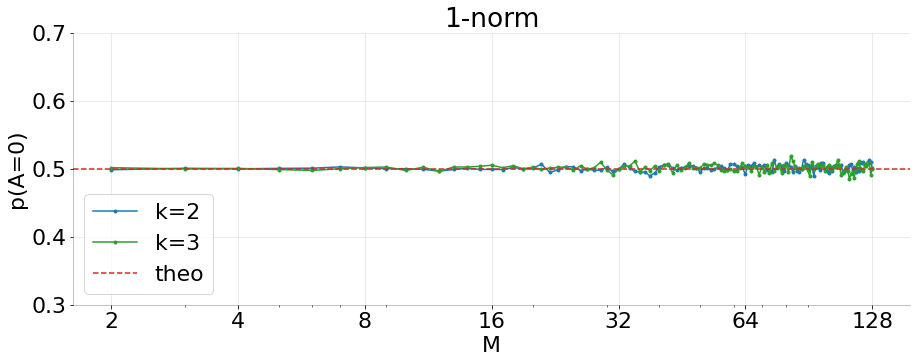

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xscale('log')
x_ticks = [2**i for i in range(0, 8)]
ax.set_xticks(x_ticks, [str(i) for i in x_ticks])
plt.plot(df_prob[df_prob['K']==2]['M1'],df_prob[df_prob['K']==2]['p(A=0)_inf-norm']/100, color='tab:blue', marker=".", label='k=2')
plt.plot(df_prob[df_prob['K']==3]['M1'],df_prob[df_prob['K']==3]['p(A=0)_inf-norm']/100, color='tab:green', marker=".", label='k=3')
plt.axhline(y=0.5, color='tab:red', linestyle='--', label='theo')
plt.title("1-norm")
plt.xlabel("M")
plt.ylabel("p(A=0)")
plt.ylim(0.3,0.7)
plt.legend(loc='lower left', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

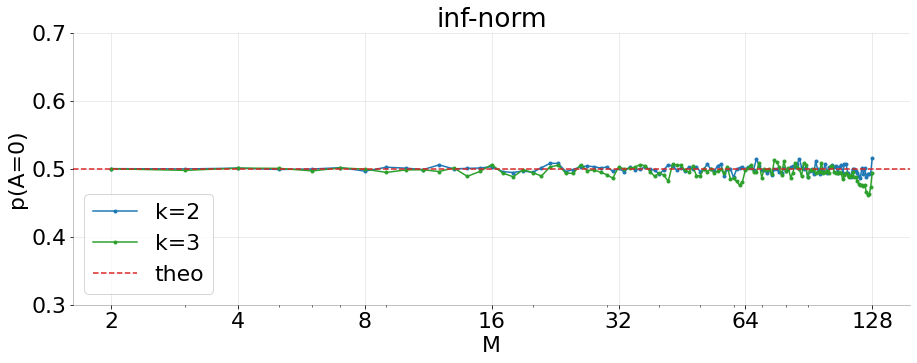

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xscale('log')
x_ticks = [2**i for i in range(0, 8)]
ax.set_xticks(x_ticks, [str(i) for i in x_ticks])
plt.plot(df_prob[df_prob['K']==2]['M1'],df_prob[df_prob['K']==2]['p(A=0)_1-norm']/100, color='tab:blue', marker=".", label='k=2')
plt.plot(df_prob[df_prob['K']==3]['M1'],df_prob[df_prob['K']==3]['p(A=0)_1-norm']/100, color='tab:green', marker=".", label='k=3')
plt.axhline(y=0.5, color='tab:red', linestyle='--', label='theo')
plt.title("inf-norm")
plt.xlabel("M")
plt.ylabel("p(A=0)")
plt.ylim(0.3,0.7)
plt.legend(loc='lower left', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [48]:
sum((df_prob[df_prob['K']==2]['p(R=1)_inf-norm']-df_prob[df_prob['K']==2]['p(R=1)_1-norm'])/100)/127

0.10236999999999997

In [49]:
sum((df_prob[df_prob['K']==3]['p(R=1)_inf-norm']-df_prob[df_prob['K']==3]['p(R=1)_1-norm'])/100)/127

0.10901511811023616

<h2>Final test<h2>

In [1]:
d = 1e-4

In [2]:
d

0.0001

In [7]:
import numpy as np
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2,3],[4,5,6]])

In [8]:
np.linalg.norm(A-B, ord='fro')

0.0

In [4]:
dataset = 'diabetes_qkmeans'
df = pd.read_csv("result/" + str(dataset) + ".csv", sep=',')
df[['n_ite','avg_similarity','SSE','silhouette','avg_ite_time']].to_csv('prova.csv')

In [5]:
df[['n_ite','avg_similarity','SSE','silhouette','avg_ite_time']]

,n_ite,avg_similarity,SSE,silhouette,avg_ite_time
0,10,75.61,3572.441,0.096,1516.36
1,10,76.52,3585.005,0.119,677.97
2,10,75.95,3623.764,0.043,711.47
3,10,77.53,3559.590,0.080,774.92
4,10,76.61,3551.952,0.111,847.56
5,10,75.79,3609.531,0.093,1076.15
6,10,72.33,3699.736,0.098,1688.45
7,10,65.88,3819.973,0.064,2482.46


<h2>Delta analysis<h2>

In [32]:
dataset = 'aniso'
df_deltakmeans = pd.read_csv("result/" + str(dataset) + "_deltakmeans.csv", sep=',')
df_deltakmeans

,index,date,K,M,N,delta,n_ite,avg_ite_time,treshold,avg_similarity,SSE,silhouette,v_measure,nm_info
0,0,2022-05-21 08:22:09,3,1500,2,1.0,10,0.01,0.0001,97.83,8976.027,0.708,0.785,0.785
1,1,2022-05-21 08:22:10,3,1500,2,1.1,10,0.01,0.0001,97.42,8964.111,0.699,0.769,0.769
2,2,2022-05-21 08:22:11,3,1500,2,1.2,10,0.01,0.0001,97.29,8973.773,0.696,0.769,0.769
3,3,2022-05-21 08:22:13,3,1500,2,1.3,10,0.01,0.0001,97.07,8958.264,0.694,0.767,0.767
4,4,2022-05-21 08:22:14,3,1500,2,1.4,10,0.01,0.0001,96.77,8969.520,0.689,0.767,0.767
5,5,2022-05-21 08:22:15,3,1500,2,1.5,10,0.01,0.0001,96.19,8967.670,0.672,0.736,0.736
6,6,2022-05-21 08:22:16,3,1500,2,1.6,10,0.01,0.0001,95.30,8985.031,0.662,0.746,0.746
7,7,2022-05-21 08:22:17,3,1500,2,1.7,10,0.01,0.0001,95.31,8963.256,0.661,0.728,0.728
8,8,2022-05-21 08:22:18,3,1500,2,1.8,10,0.01,0.0001,94.66,9001.128,0.665,0.747,0.747
9,9,2022-05-21 08:22:20,3,1500,2,1.9,10,0.01,0.0001,94.23,8982.723,0.659,0.741,0.741


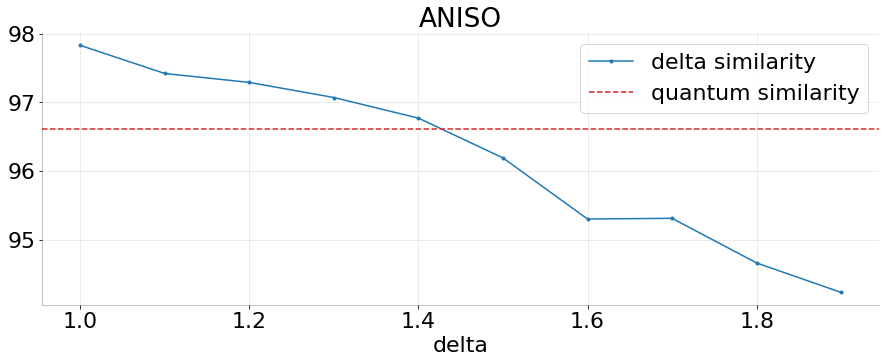

In [33]:
plt.figure(figsize=(15,5))
plt.plot(df_deltakmeans['delta'],df_deltakmeans['avg_similarity'], color='tab:blue', marker=".", label='delta similarity')
plt.axhline(y=96.61, color='tab:red', linestyle='--', label='quantum similarity')
plt.title("ANISO")
plt.xlabel('delta')
plt.legend(loc='upper right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [34]:
dataset = 'blobs'
df_deltakmeans = pd.read_csv("result/" + str(dataset) + "_deltakmeans.csv", sep=',')
df_deltakmeans

,index,date,K,M,N,delta,n_ite,avg_ite_time,treshold,avg_similarity,SSE,silhouette,v_measure,nm_info
0,0,2022-05-21 08:23:12,3,1500,2,1.0,10,0.01,0.0001,99.81,8498.411,0.868,0.978,0.978
1,1,2022-05-21 08:23:13,3,1500,2,1.1,10,0.01,0.0001,99.83,8496.548,0.869,0.991,0.991
2,2,2022-05-21 08:23:15,3,1500,2,1.2,10,0.01,0.0001,99.73,8496.289,0.868,0.988,0.988
3,3,2022-05-21 08:23:16,3,1500,2,1.3,10,0.01,0.0001,99.78,8496.548,0.869,0.991,0.991
4,4,2022-05-21 08:23:17,3,1500,2,1.4,10,0.01,0.0001,99.77,8494.297,0.865,0.983,0.983
5,5,2022-05-21 08:23:18,3,1500,2,1.5,10,0.01,0.0001,99.63,8495.545,0.865,0.986,0.986
6,6,2022-05-21 08:23:19,3,1500,2,1.6,10,0.01,0.0001,99.45,8497.732,0.865,0.981,0.981
7,7,2022-05-21 08:23:21,3,1500,2,1.7,10,0.01,0.0001,99.37,8498.479,0.858,0.957,0.957
8,8,2022-05-21 08:23:22,3,1500,2,1.8,10,0.01,0.0001,99.35,8498.085,0.859,0.962,0.962
9,9,2022-05-21 08:23:23,3,1500,2,1.9,10,0.01,0.0001,99.15,8498.205,0.855,0.955,0.955


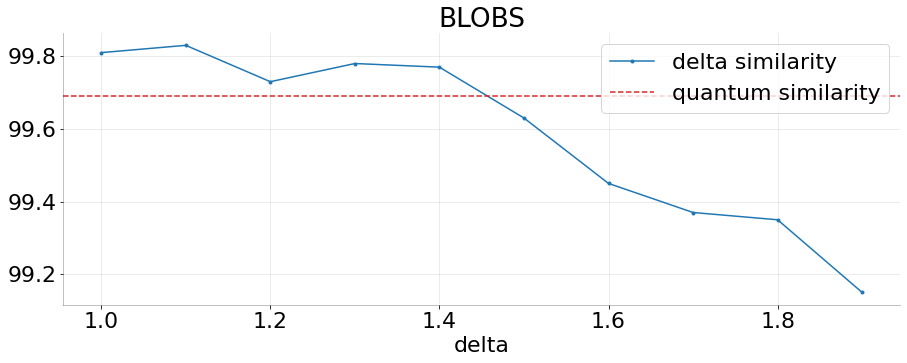

In [35]:
plt.figure(figsize=(15,5))
plt.plot(df_deltakmeans['delta'],df_deltakmeans['avg_similarity'], color='tab:blue', marker=".", label='delta similarity')
plt.axhline(y=99.69, color='tab:red', linestyle='--', label='quantum similarity')
plt.title("BLOBS")
plt.xlabel('delta')
plt.legend(loc='upper right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [36]:
dataset = 'blobs2'
df_deltakmeans = pd.read_csv("result/" + str(dataset) + "_deltakmeans.csv", sep=',')
df_deltakmeans

,index,date,K,M,N,delta,n_ite,avg_ite_time,treshold,avg_similarity,SSE,silhouette,v_measure,nm_info
0,0,2022-05-21 08:25:13,3,1500,2,0.0,3,0.01,0.0001,99.22,8832.621,0.722,0.684,0.684
1,1,2022-05-21 08:25:13,3,1500,2,0.1,4,0.01,0.0001,99.42,8830.594,0.721,0.683,0.683
2,2,2022-05-21 08:25:14,3,1500,2,0.2,10,0.01,0.0001,99.59,8836.913,0.722,0.687,0.687
3,3,2022-05-21 08:25:15,3,1500,2,0.3,10,0.01,0.0001,99.44,8834.052,0.722,0.687,0.687
4,4,2022-05-21 08:25:16,3,1500,2,0.4,10,0.01,0.0001,99.37,8833.010,0.722,0.687,0.687
5,5,2022-05-21 08:25:17,3,1500,2,0.5,10,0.01,0.0001,99.28,8832.805,0.723,0.687,0.687
6,6,2022-05-21 08:25:19,3,1500,2,0.6,10,0.01,0.0001,99.07,8838.807,0.722,0.687,0.687
7,7,2022-05-21 08:25:20,3,1500,2,0.7,10,0.01,0.0001,98.84,8833.566,0.720,0.685,0.685
8,8,2022-05-21 08:25:21,3,1500,2,0.8,10,0.01,0.0001,98.63,8838.264,0.718,0.683,0.683
9,9,2022-05-21 08:25:22,3,1500,2,0.9,10,0.01,0.0001,98.46,8852.437,0.716,0.686,0.686


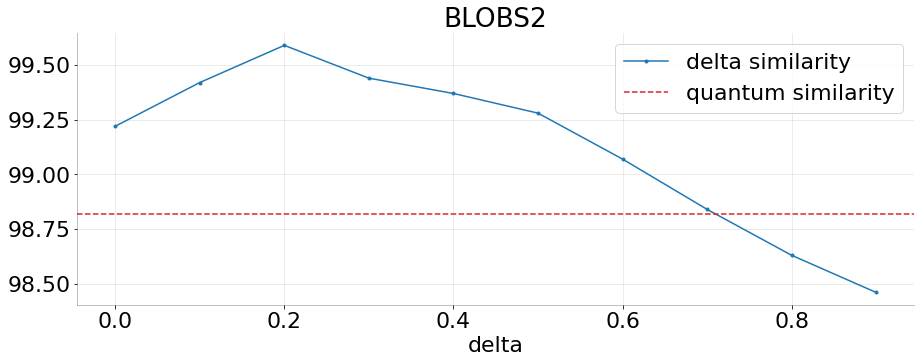

In [37]:
plt.figure(figsize=(15,5))
plt.plot(df_deltakmeans['delta'],df_deltakmeans['avg_similarity'], color='tab:blue', marker=".", label='delta similarity')
plt.axhline(y=98.82, color='tab:red', linestyle='--', label='quantum similarity')
plt.title("BLOBS2")
plt.xlabel('delta')
plt.legend(loc='upper right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [38]:
dataset = 'noisymoon'
df_deltakmeans = pd.read_csv("result/" + str(dataset) + "_deltakmeans.csv", sep=',')
df_deltakmeans

,index,date,K,M,N,delta,n_ite,avg_ite_time,treshold,avg_similarity,SSE,silhouette,v_measure,nm_info
0,0,2022-05-21 08:28:17,2,1500,2,4.0,10,0.01,0.0001,99.37,9294.675,0.550,0.382,0.382
1,1,2022-05-21 08:28:18,2,1500,2,4.1,10,0.01,0.0001,99.22,9317.796,0.548,0.384,0.384
2,2,2022-05-21 08:28:19,2,1500,2,4.2,10,0.01,0.0001,99.22,9296.754,0.549,0.382,0.382
3,3,2022-05-21 08:28:20,2,1500,2,4.3,10,0.01,0.0001,99.14,9363.515,0.548,0.392,0.392
4,4,2022-05-21 08:28:21,2,1500,2,4.4,8,0.01,0.0001,99.12,9343.212,0.548,0.389,0.389
5,5,2022-05-21 08:28:22,2,1500,2,4.5,10,0.01,0.0001,99.08,9314.402,0.547,0.380,0.380
6,6,2022-05-21 08:28:23,2,1500,2,4.6,10,0.01,0.0001,99.03,9306.213,0.547,0.379,0.379
7,7,2022-05-21 08:28:25,2,1500,2,4.7,10,0.01,0.0001,98.98,9349.739,0.546,0.387,0.387
8,8,2022-05-21 08:28:26,2,1500,2,4.8,10,0.01,0.0001,98.95,9364.827,0.546,0.390,0.390
9,9,2022-05-21 08:28:27,2,1500,2,4.9,10,0.01,0.0001,98.77,9433.893,0.544,0.400,0.400


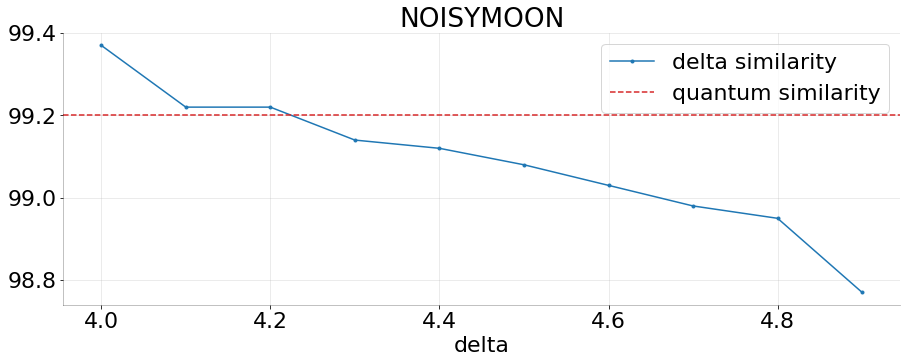

In [39]:
plt.figure(figsize=(15,5))
plt.plot(df_deltakmeans['delta'],df_deltakmeans['avg_similarity'], color='tab:blue', marker=".", label='delta similarity')
plt.axhline(y=99.20, color='tab:red', linestyle='--', label='quantum similarity')
plt.title("NOISYMOON")
plt.xlabel('delta')
plt.legend(loc='upper right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

<h2>Elbow method<h2>

In [2]:
dataset = 'diabetes'
df_kmeans = pd.read_csv("result/" + str(dataset) + "_kmeans.csv", sep=',')
df_kmeans

,index,date,K,M,N,n_ite,avg_ite_time,treshold,SSE,silhouette,v_measure,nm_info
0,0,2022-11-09 18:56:41,2,442,7,5,0.0,0.0001,5.285,0.216,None,None
1,1,2022-11-09 18:56:41,3,442,7,5,0.0,0.0001,4.756,0.167,None,None
2,2,2022-11-09 18:56:41,4,442,7,5,0.0,0.0001,4.209,0.157,None,None
3,3,2022-11-09 18:56:41,5,442,7,5,0.0,0.0001,3.913,0.163,None,None
4,4,2022-11-09 18:56:41,6,442,7,5,0.0,0.0001,3.765,0.143,None,None
5,5,2022-11-09 18:56:41,7,442,7,5,0.0,0.0001,3.437,0.154,None,None
6,6,2022-11-09 18:56:41,8,442,7,5,0.0,0.0001,3.216,0.161,None,None
7,7,2022-11-09 18:56:41,9,442,7,5,0.0,0.0001,2.996,0.172,None,None
8,8,2022-11-09 18:56:41,10,442,7,5,0.0,0.0001,2.822,0.173,None,None
9,9,2022-11-09 18:56:41,11,442,7,5,0.0,0.0001,2.675,0.176,None,None


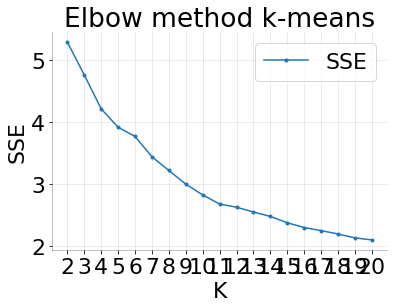

In [4]:
plt.plot(df_kmeans['K'], df_kmeans['SSE'],color='tab:blue', marker=".", label='SSE')
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(2, 21, 1))
#plt.tick_params(axis='both', which='major', labelsize=22)
plt.title("Elbow method k-means")
plt.legend(loc='upper right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [3]:
dataset = 'iris'
df_qkmeans = pd.read_csv("result/" + str(dataset) + "_qkmeans.csv", sep=',')
df_qkmeans

,index,date,q_v,K,M,N,M1,shots,n_circuits,max_qbits,n_ite,avg_ite_time,avg_ite_hw_time,treshold,avg_similarity,SSE,silhouette,v_measure,nm_info
0,0,2022-05-20 15:02:26,1,2,150,4,None,8192,0,5,5,53.05,0.0,0.0001,97.47,1297.958,0.522,None,None
1,1,2022-05-20 15:06:51,1,3,150,4,None,8192,0,5,7,80.11,0.0,0.0001,95.33,1163.300,0.480,None,None
2,2,2022-05-20 15:02:26,1,4,150,4,None,8192,0,5,10,106.19,0.0,0.0001,94.87,1128.698,0.408,None,None
3,3,2022-05-20 15:20:08,1,5,150,4,None,8192,0,5,10,129.89,0.0,0.0001,94.93,1135.569,0.258,None,None
4,4,2022-05-20 15:02:26,1,6,150,4,None,8192,0,5,10,156.97,0.0,0.0001,93.27,1139.382,0.140,None,None
5,5,2022-05-20 15:28:36,1,7,150,4,None,8192,0,5,10,177.19,0.0,0.0001,89.60,1116.908,0.130,None,None
6,6,2022-05-20 15:02:26,1,8,150,4,None,8192,0,5,10,207.92,0.0,0.0001,90.20,1066.977,0.174,None,None


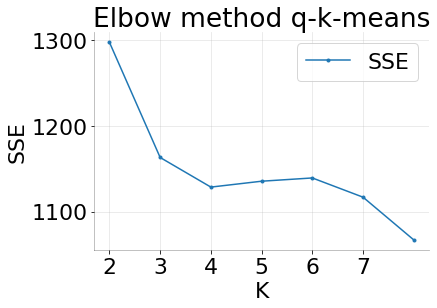

In [4]:
plt.plot(df_qkmeans['K'], df_qkmeans['SSE'],color='tab:blue', marker=".", label='SSE')
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(2, 8, 1))
#plt.tick_params(axis='both', which='major', labelsize=22)
plt.title("Elbow method q-k-means")
plt.legend(loc='upper right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [18]:
df_kmeans[df_kmeans['K']==3]

,index,date,K,M,N,n_ite,avg_ite_time,treshold,SSE,silhouette,v_measure,nm_info
1,1,2022-03-13 09:37:01,3,150,4,4,0.0,0.0001,565.5,0.51,None,None


In [4]:
df_qkmeans[df_qkmeans['K']==3]

,index,date,q_v,K,M,N,M1,shots,n_circuits,max_qbits,n_ite,avg_ite_time,avg_ite_hw_time,treshold,avg_similarity,SSE,silhouette,v_measure,nm_info
1,1,2022-05-20 15:06:51,1,3,150,4,None,8192,0,5,7,80.11,0.0,0.0001,95.33,1163.3,0.48,None,None


In [5]:
dataset = 'diabetes'
df_kmeans = pd.read_csv("result/" + str(dataset) + "_kmeans.csv", sep=',')
df_kmeans

,index,date,K,M,N,n_ite,avg_ite_time,treshold,SSE,silhouette,v_measure,nm_info
0,0,2022-05-20 18:33:24,8,442,4,7,0.0,0.0001,1671.271,0.371,None,None


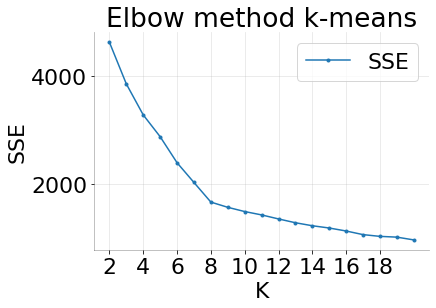

In [3]:
plt.plot(df_kmeans['K'], df_kmeans['SSE'],color='tab:blue', marker=".", label='SSE')
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(2, 20, 2))
#plt.tick_params(axis='both', which='major', labelsize=22)
plt.title("Elbow method k-means")
plt.legend(loc='upper right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [7]:
configuration = (7 if 'qkmeans'=='qkmooeans' else 0)

In [8]:
configuration

0

In [6]:
dataset = 'diabetes'
df_kmeans = pd.read_csv("result/" + str(dataset) + "_qkmeans.csv", sep=',')
df_kmeans

,index,date,q_v,K,M,N,M1,shots,n_circuits,max_qbits,n_ite,avg_ite_time,avg_ite_hw_time,treshold,avg_similarity,SSE,silhouette,v_measure,nm_info
0,0,2022-05-20 16:41:26,1,8,442,4,None,8192,0,5,10,671.61,0.0,0.0001,87.83,3542.852,0.208,None,None


<h2>For presentation<h2>

In [40]:
lst = [['q-k-means-q1',1024,98.83],['q-k-means-q2',3072,97.17],['q-k-means-q3',460800,97.80]]
aniso = pd.DataFrame(lst, columns=['algorithm','shots','similarity'])

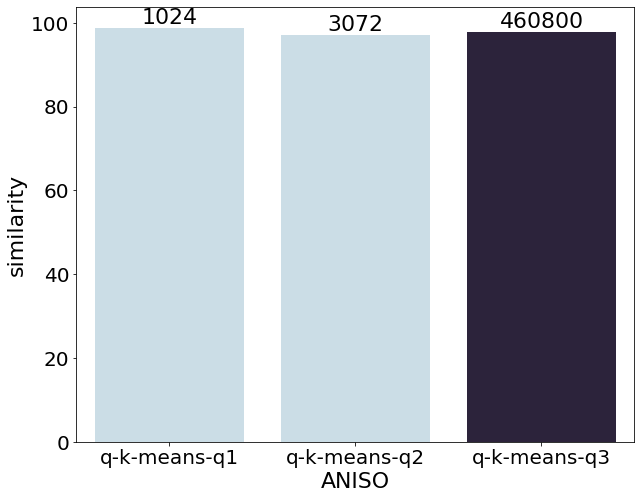

In [41]:
import seaborn as sns
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.ylabel('similarity', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.barplot(data=aniso, x='algorithm', y='similarity', palette=colors_from_values(aniso['shots'], "ch:s=.25,rot=-.25"))
ax.bar_label(ax.containers[0], labels=aniso['shots'])
ax.set(xlabel='ANISO')
plt.show()

In [42]:
lst = [['q-k-means-q1',1024,99.33],['q-k-means-q2',3072,84.40],['q-k-means-q3',460800,94.60]]
blobs = pd.DataFrame(lst, columns=['algorithm','shots','similarity'])

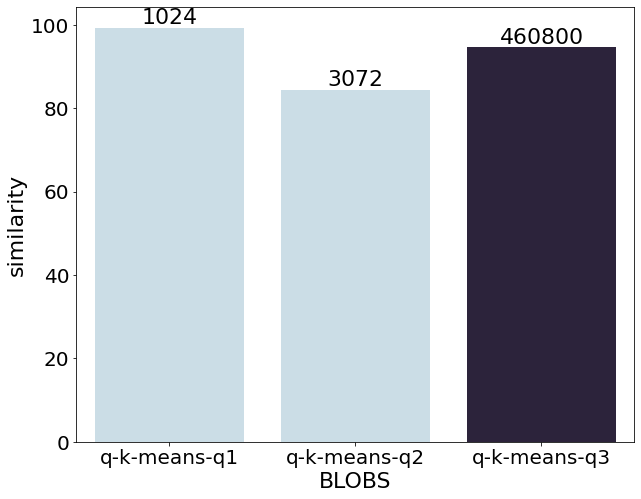

In [43]:
import seaborn as sns
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.ylabel('similarity', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax=sns.barplot(data=blobs, x='algorithm', y='similarity', palette=colors_from_values(blobs['shots'], "ch:s=.25,rot=-.25"))
ax.bar_label(ax.containers[0], labels=aniso['shots'])
ax.set(xlabel='BLOBS')
plt.show()

In [44]:
lst = [['q-k-means-q1',1024,96.37],['q-k-means-q2',3072,97.40],['q-k-means-q3',460800,96.73]]
blobs2 = pd.DataFrame(lst, columns=['algorithm','shots','similarity'])

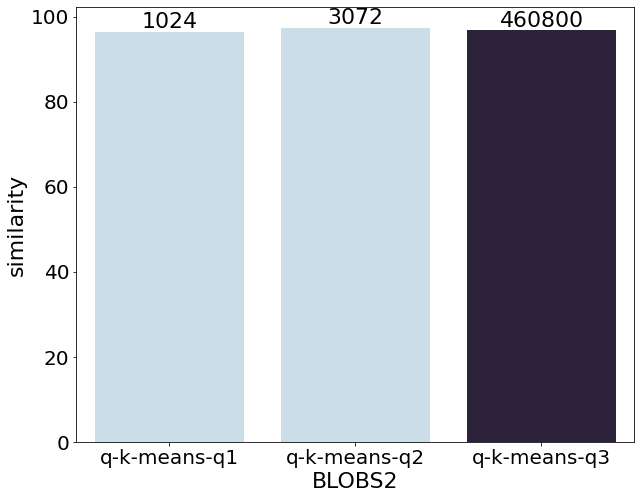

In [45]:
import seaborn as sns
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.ylabel('similarity', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax=sns.barplot(data=blobs2, x='algorithm', y='similarity', palette=colors_from_values(blobs2['shots'], "ch:s=.25,rot=-.25"))
ax.bar_label(ax.containers[0], labels=aniso['shots'])
ax.set(xlabel='BLOBS2')
plt.show()

In [48]:
lst = [['q-k-means-q1',1024,97.33],['q-k-means-q2',2048,98.0],['q-k-means-q3',307200,97.50]]
noisy = pd.DataFrame(lst, columns=['algorithm','shots','similarity'])

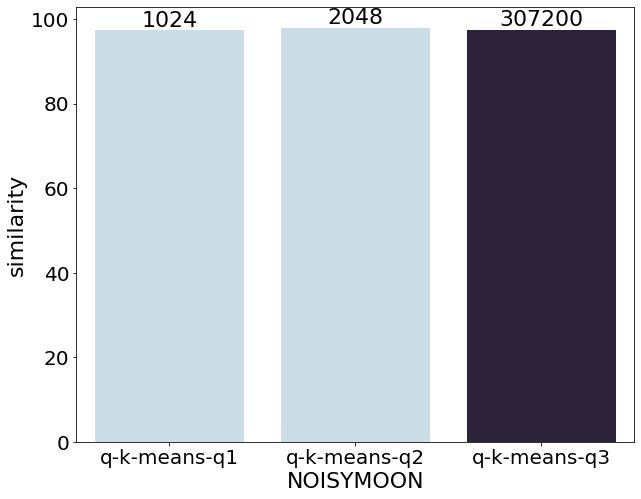

In [50]:
import seaborn as sns
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.ylabel('similarity', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax=sns.barplot(data=noisy, x='algorithm', y='similarity', palette=colors_from_values(noisy['shots'], "ch:s=.25,rot=-.25"))
ax.bar_label(ax.containers[0], labels=noisy['shots'])
ax.set(xlabel='NOISYMOON')
plt.show()